In [2]:
# Cell 1: 环境与路径设置
import sys
sys.path.append('..')

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.siamese_tracker import SiameseTracker
MODEL_PATH = '../siamfc-pytorch/siamfc_alexnet_e50.pth'
# 视频路径（与其他 notebook 保持一致）
VIDEO_PATH_MUG = '../Test-Videos/Antoine_Mug.mp4'

## 运行 SiamFC 原型
下面的代码会交互式选择 ROI（首次帧），然后运行跟踪并将结果保存到 `../results/q7_siamese`（若启用）。

In [ ]:
tracker = SiameseTracker(
    video_path=VIDEO_PATH_MUG,
    net_path=MODEL_PATH,   # 关键：把路径传进去
    device='cpu',  # 更改为 'cuda' 若你有可用 GPU
    debug=False
)
# 保存跟踪结果到 ../results/q7_siamese 并同时可视化
tracker.track_video(visualize=True, save_result=True, output_dir='../results/q7_siamese')

Loading pretrained SiamFC model...
✓ Pretrained Siamese network loaded!

=== ROI Selection ===
1. Drag to select the target
2. Press ENTER or SPACE to confirm
3. Press 'c' to cancel

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
✓ Pretrained Siamese network loaded!

=== ROI Selection ===
1. Drag to select the target
2. Press ENTER or SPACE to confirm
3. Press 'c' to cancel

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!

Initializing real Siamese network...
Results will be saved to: ../results/q7_siamese

🎯 Tracking with REAL Siamese Network (GOT-10k trained)
Press ESC to quit | Press 'p' to pause


Initializing real Siamese network...
Results will be saved to: ../results/q7_siamese

🎯 Tracking with REAL Siamese Network (GOT-10k trained)
Press ESC to quit | Press 'p' to pause

📊 Frame 50 | Avg FPS: 18.8
📊 Frame 50 | Avg FPS: 18.8
📊 Frame 100 | Avg FPS: 19.1
📊 Frame 100 | Avg F

: 

## 可视化结果（示例）
如果你保存了结果帧，下面的代码会加载一些关键帧并展示对比。

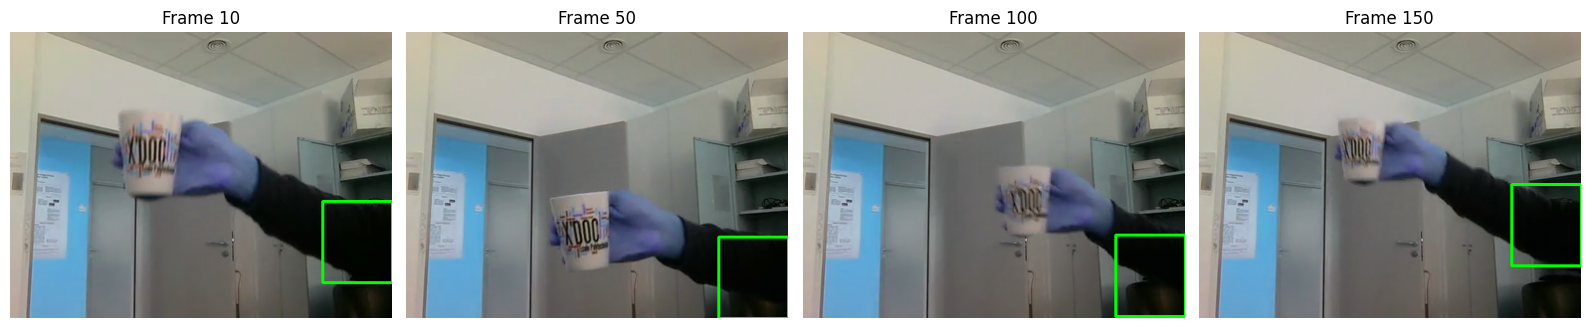

In [3]:
# Cell 3: 展示若干保存的结果帧（如果存在）
import os
from PIL import Image

out_dir = '../results/q7_siamese'
frame_nums = [10, 50, 100, 150]

fig, axes = plt.subplots(1, len(frame_nums), figsize=(16, 4))
for ax, n in zip(axes, frame_nums):
    path = os.path.join(out_dir, f'Frame_{n:04d}.png')
    if os.path.exists(path):
        img = Image.open(path)
        ax.imshow(np.array(img)[:,:,::-1])  # BGR->RGB
        ax.set_title(f'Frame {n}')
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, 'Not found', ha='center', va='center')
        ax.axis('off')

plt.tight_layout()
plt.show()

## 下一步：添加 SOTA 跟踪器（占位）
我会在后续把一个或多个当前 SOTA 跟踪器（例如 SiamRPN / SiamMask / OSTrack / TransT 等）加入到本 notebook 中，提供训练好的模型加载和对比脚本。

请告诉我你更偏好哪个 SOTA：SiamRPN (更强的尺度回归), OSTrack (Transformer-based, state-of-the-art), 还是你想试别的？